In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
part1=pd.read_csv('_2019-1-24_0226_60k_p1.csv', encoding = 'utf-8')
#part2=pd.read_csv('_2019-1-24_0233_60k_p2.csv')
#part3=pd.read_csv('_2019-1-24_0238_60k_p3.csv')

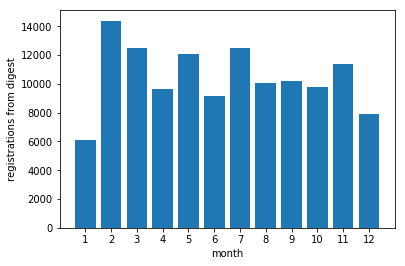

In [3]:
part1['dt']=pd.to_datetime(part1['reg_created'])
part1['mounth']=part1['dt'].dt.month
season = part1.groupby(['mounth']).count()
plt.bar(season.index, season['reg_created'])
plt.xticks(np.arange(1,13,1))
plt.xlabel('month')
plt.ylabel('registrations from digest')
plt.show()

In [4]:
grouped = part1.groupby(['email']).count()
grouped.head()

,reg_created,reg_status,sum,user_id,event_id,name,count(*),dt,mounth
email,,,,,,,,,
+79161133201@yandex.ru,1,1,1,1,1,1,1,1,1
+79522485543@yandex.ru,2,2,2,2,2,2,2,2,2
--@mail.ru,1,1,1,1,1,1,1,1,1
000kms@mail.ru,10,10,10,10,10,10,10,10,10
0012m@list.ru,1,1,1,1,1,1,1,1,1


In [5]:
print len(grouped), '- всего пользователей регавшихся из дайджеста'
print len(grouped.loc[grouped['event_id']== 1]), '- регавшихся из дайджеста только один раз'
print round(100*(len(grouped) - len(grouped.loc[grouped['event_id']== 1]))/float(len(grouped)), 2), '- % регавшихся больше 1 раза'

61372 - всего пользователей регавшихся из дайджеста
39573 - регавшихся из дайджеста только один раз
35.52 - % регавшихся больше 1 раза


__Распределение пользователей от количества регистраций с дайджеста__

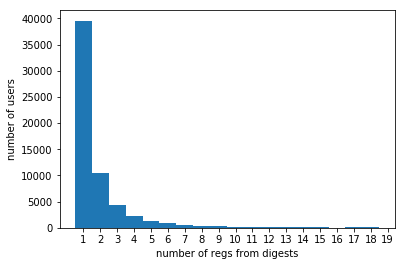

In [6]:
bins = np.arange(1, 20, 1)
plt.hist(grouped['event_id'], bins,  range=(1, 21), align='left')
plt.ylabel('number of users')
plt.xlabel('number of regs from digests')
#plt.hist(grouped['event_id'], bins,  range=(1, 21))
plt.xticks( bins)
plt.show()

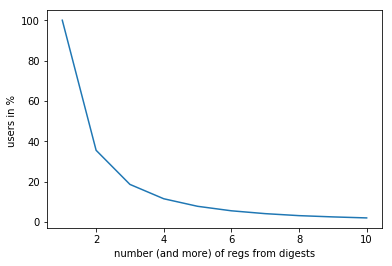

35.52 - % пользователей сделали больше одной регистрации из дайджеста


In [34]:
pers = np.array([])
for i in range(10):
    pers = np.append(pers, 100*len(grouped.loc[grouped['event_id'] > i])/float(len(grouped)) )
plt.plot(np.arange(1,11, 1), pers)
plt.ylabel('users in % ')
plt.xlabel('number (and more) of regs from digests')
plt.show()
print round(pers[1], 2), '- % пользователей сделали больше одной регистрации из дайджеста'

__Только платные события__

In [7]:
pay_only = part1.loc[part1['reg_status'] != 'ok']
pay_grouped = pay_only.groupby(['email']).count()
print round(100*len(pay_grouped)/float(len(grouped)),2), "- % пользователей регистрировались на платные события из дайджеста"

5.36 - % пользователей регистрировались на платные события из дайджеста


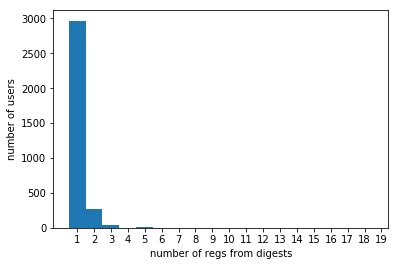

In [8]:
bins = np.arange(1, 20, 1)
plt.hist(pay_grouped['event_id'], bins,  range=(1, 21) , align='left')
plt.ylabel('number of users')
plt.xlabel('number of regs from digests')
plt.xticks( bins)
plt.show()

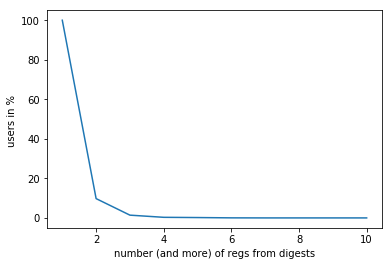

9.77 - % платящих пользователей сделали больше одной регистрации из дайджеста


In [9]:
pay_pers = np.array([])
for i in range(10):
    pay_pers = np.append(pay_pers, 100*len(pay_grouped.loc[pay_grouped['event_id'] > i])/float(len(pay_grouped)) )
plt.plot(np.arange(1,11, 1), pay_pers)
plt.ylabel('users in % ')
plt.xlabel('number (and more) of regs from digests')
plt.show()
print round(pay_pers[1], 2), '- % платящих пользователей сделали больше одной регистрации из дайджеста'

__В разрезе категорий__

In [10]:
grouped_cat = part1.groupby(['name']).count()
grouped_cat['percentage']=100*grouped_cat['reg_created']/grouped_cat['reg_created'].sum()
sort_group = grouped_cat.sort_values('reg_created', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sort_group.head()
#тоже только для платных
#pay_grouped
pay_grouped_cat = pay_only.groupby(['name']).count()
pay_grouped_cat['percentage']=100*pay_grouped_cat['reg_created']/pay_grouped_cat['reg_created'].sum()
sort_pay_group = pay_grouped_cat.sort_values('reg_created', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sort_pay_group.head()

In [96]:
#df = pd.DataFrame(grouped_cat)
#df.head()
#plt.pie(sort_group['reg_created'], labels = sort_group.index)
#for i in df.index.tolist():
#plt.show()

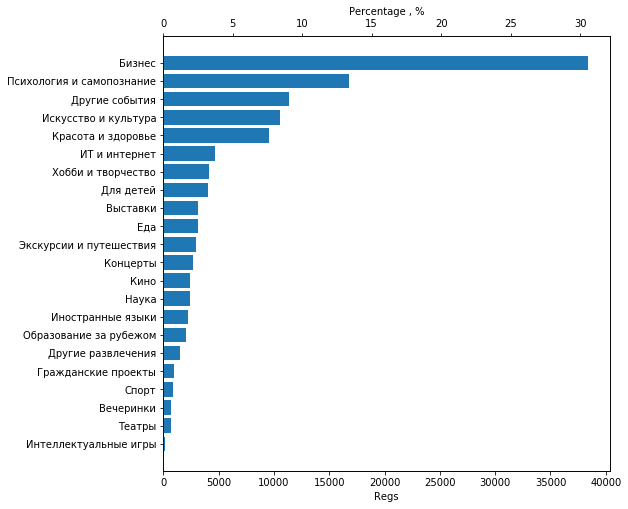

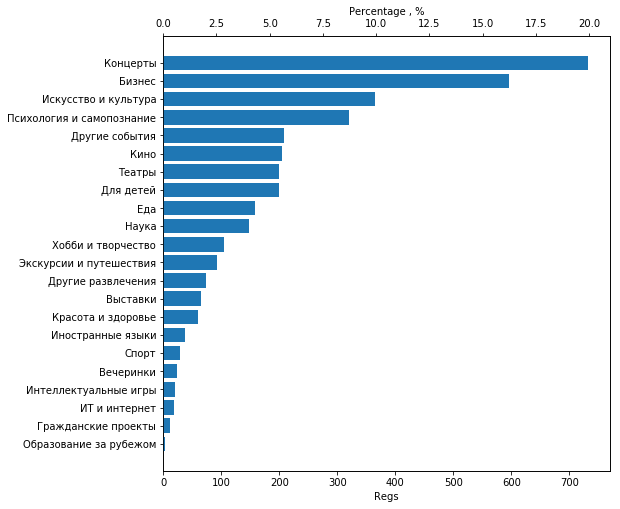

In [11]:

fig, ax1 = plt.subplots()
#plt.subplot(1, 1, 1)
ax1.barh(sort_group.index, sort_group['reg_created'])
ax1.set_xlabel('Regs')
ax2 = ax1.twiny()
#plt.subplot(1, 2, 1)
ax2.barh(sort_group.index, sort_group['percentage'])
ax2.set_xlabel('Percentage , %')
plt.gcf().set_size_inches(8, 8)
# платные 
fig_p, ax1_p = plt.subplots()
#plt.subplot(1, 2, 2)
ax1_p.barh(sort_pay_group.index, sort_pay_group['reg_created'])
ax1_p.set_xlabel('Regs')
ax2_p = ax1_p.twiny()
ax2_p.barh(sort_pay_group.index, sort_pay_group['percentage'])
ax2_p.set_xlabel('Percentage , %')
plt.gcf().set_size_inches(8, 8)
plt.show()

__Регистрировавшиеся больше одного раза по категориям__

In [12]:
emails_loyal = grouped.loc[grouped['event_id']> 1].index
#emails =grouped_cat.loc[grouped_cat]
loyal = part1.loc[part1['email'].isin(emails_loyal)]
loyal_grouped_cat= loyal.groupby(['name']).count()
loyal_grouped_cat['percentage']=100*loyal_grouped_cat['reg_created']/loyal_grouped_cat['reg_created'].sum()
sort_loyal_group = loyal_grouped_cat.sort_values('reg_created', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')


In [13]:
pay_emails_loyal = pay_grouped.loc[pay_grouped['event_id']> 1].index
#emails =grouped_cat.loc[grouped_cat]
#pay_loyal = part1.loc[part1['email'].isin(emails_loyal)]
pay_loyal = pay_only.loc[pay_only['email'].isin(pay_emails_loyal)]
pay_loyal_grouped_cat= pay_loyal.groupby(['name']).count()
pay_loyal_grouped_cat['percentage']=100*pay_loyal_grouped_cat['reg_created']/pay_loyal_grouped_cat['reg_created'].sum()
sort_pay_loyal_group = pay_loyal_grouped_cat.sort_values('reg_created', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')


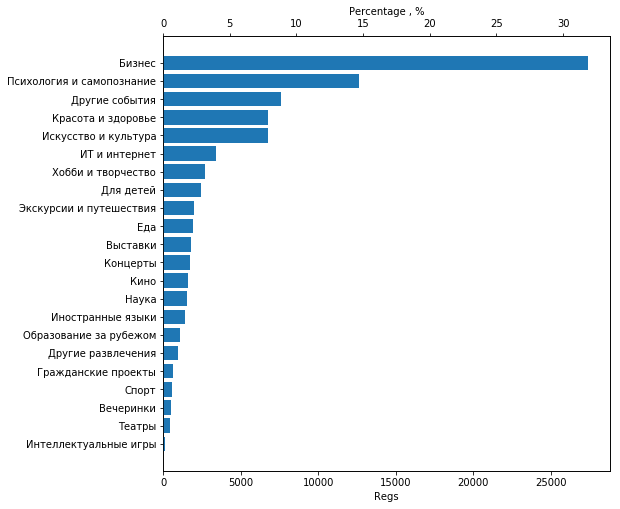

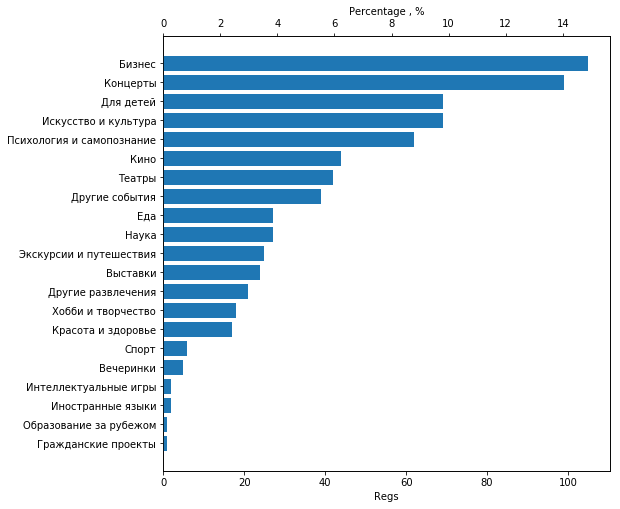

In [117]:
fig, ax1 = plt.subplots()
#plt.subplot(1, 1, 1)
ax1.barh(sort_loyal_group.index, sort_loyal_group['reg_created'])
ax1.set_xlabel('Regs')
ax2 = ax1.twiny()
#plt.subplot(1, 2, 1)
ax2.barh(sort_loyal_group.index, sort_loyal_group['percentage'])
ax2.set_xlabel('Percentage , %')
plt.gcf().set_size_inches(8, 8)
#платные >1
fig, ax1 = plt.subplots()
#plt.subplot(1, 1, 1)
ax1.barh(sort_pay_loyal_group.index, sort_pay_loyal_group['reg_created'])
ax1.set_xlabel('Regs')
ax2 = ax1.twiny()
#plt.subplot(1, 2, 1)
ax2.barh(sort_pay_loyal_group.index, sort_pay_loyal_group['percentage'])
ax2.set_xlabel('Percentage , %')
plt.gcf().set_size_inches(8, 8)

In [111]:
#loyal
loyal_grouped_cat_pair = loyal.groupby(['email','name'] ).count()
loyal
table = pd.pivot_table(loyal, values='count(*)', index=['email'],
                    columns=['name'], aggfunc=np.sum)
#table['new2'] = np.random.randint(100)#, size=(100, 6))
#table[table.columns[9:11]].dropna()#, 'Интелектуальные игры')
table.head()
#table[table.columns[9]]

name,Бизнес,Вечеринки,Выставки,Гражданские проекты,Для детей,Другие развлечения,Другие события,Еда,ИТ и интернет,Иностранные языки,...,Кино,Концерты,Красота и здоровье,Наука,Образование за рубежом,Психология и самопознание,Спорт,Театры,Хобби и творчество,Экскурсии и путешествия
email,,,,,,,,,,,,,,,,,,,,,
+79522485543@yandex.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000kms@mail.ru,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN
001@sibsuvenir.com,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007112015@mail.ru,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01002@mail.ru,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


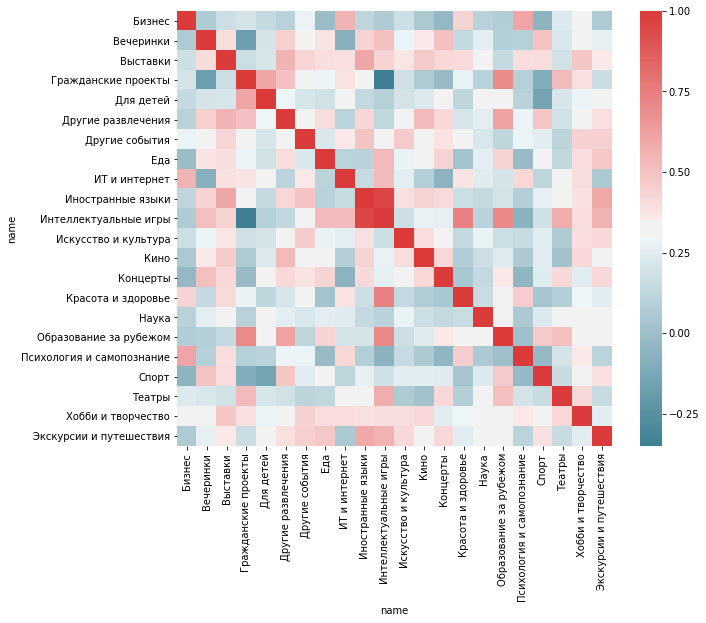

In [88]:
import seaborn as sns



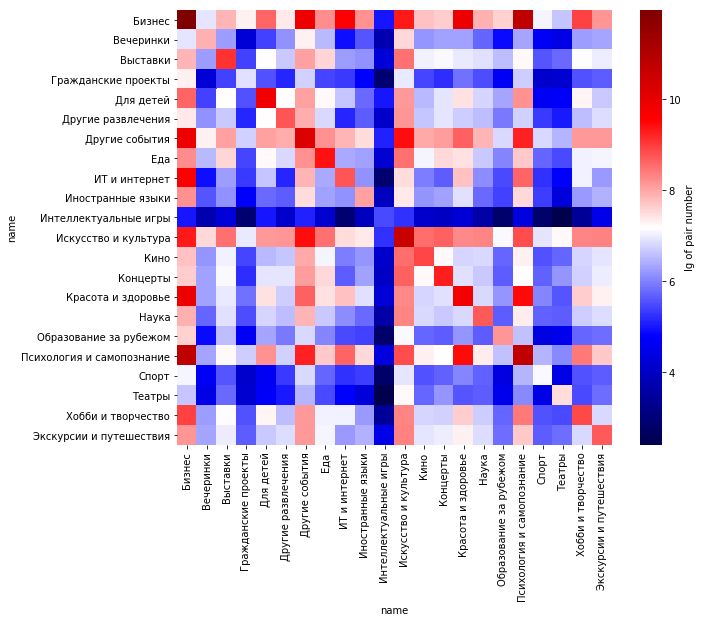

In [147]:
table.fillna(0, inplace=True)
f, ax = plt.subplots(figsize=(10, 8))
cat_cross = np.dot(table.T, table)

lg_cat_cross = np.log(cat_cross)
df_cross= pd.DataFrame(np.log(cat_cross), index =table.columns , columns=table.columns )
#df_cross[df_cross[10]].sum()
sns.heatmap(df_cross, mask=np.zeros_like(df_cross, dtype=np.bool), cmap='seismic',
            square=True,   ax=ax, xticklabels=df_cross.columns, yticklabels=df_cross.columns,  cbar_kws={'label': 'lg of pair number'})


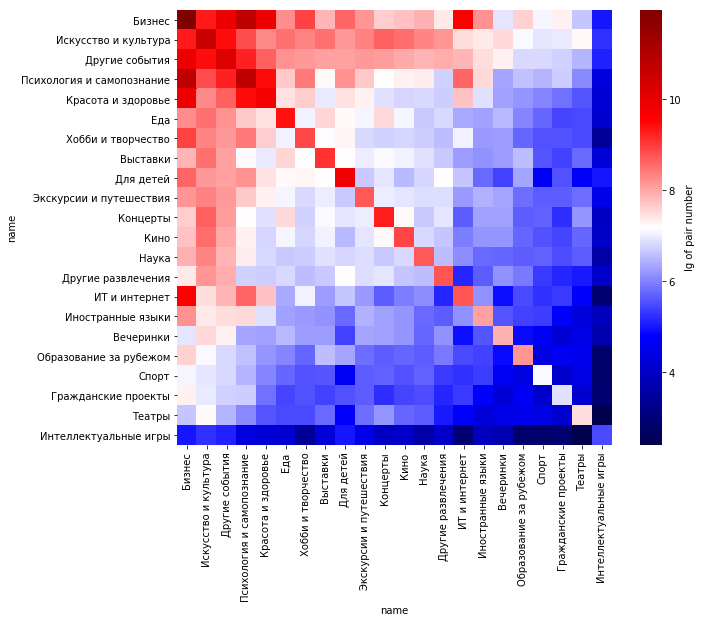

In [172]:
# сортируем по средней величине связи в категории
df_temp= pd.DataFrame(df_cross.mean(), index = df_cross.mean().index, columns =['mean'])

df_temp.sort_values(by=['mean'], inplace = True, ascending=False)
#df_temp
#sorted_index = df_temp.index
sorted_table = table.reindex(columns=df_temp.index)
cat_cross_sort = np.dot(sorted_table.T,sorted_table)
#lg_cat_cross_sort = np.log(cat_cross_sort)
df_cross_sort= pd.DataFrame(np.log(cat_cross_sort), index =sorted_table.columns , columns=sorted_table.columns )
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_cross_sort, mask=np.zeros_like(df_cross_sort, dtype=np.bool), cmap='seismic',
            square=True,   ax=ax, xticklabels=df_cross_sort.columns, yticklabels=df_cross_sort.columns,  cbar_kws={'label': 'lg of pair number'})
